# Import libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# set columns show max 25
pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings("ignore")

In [22]:
df = pd.read_csv('preprocessed/df.csv')
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


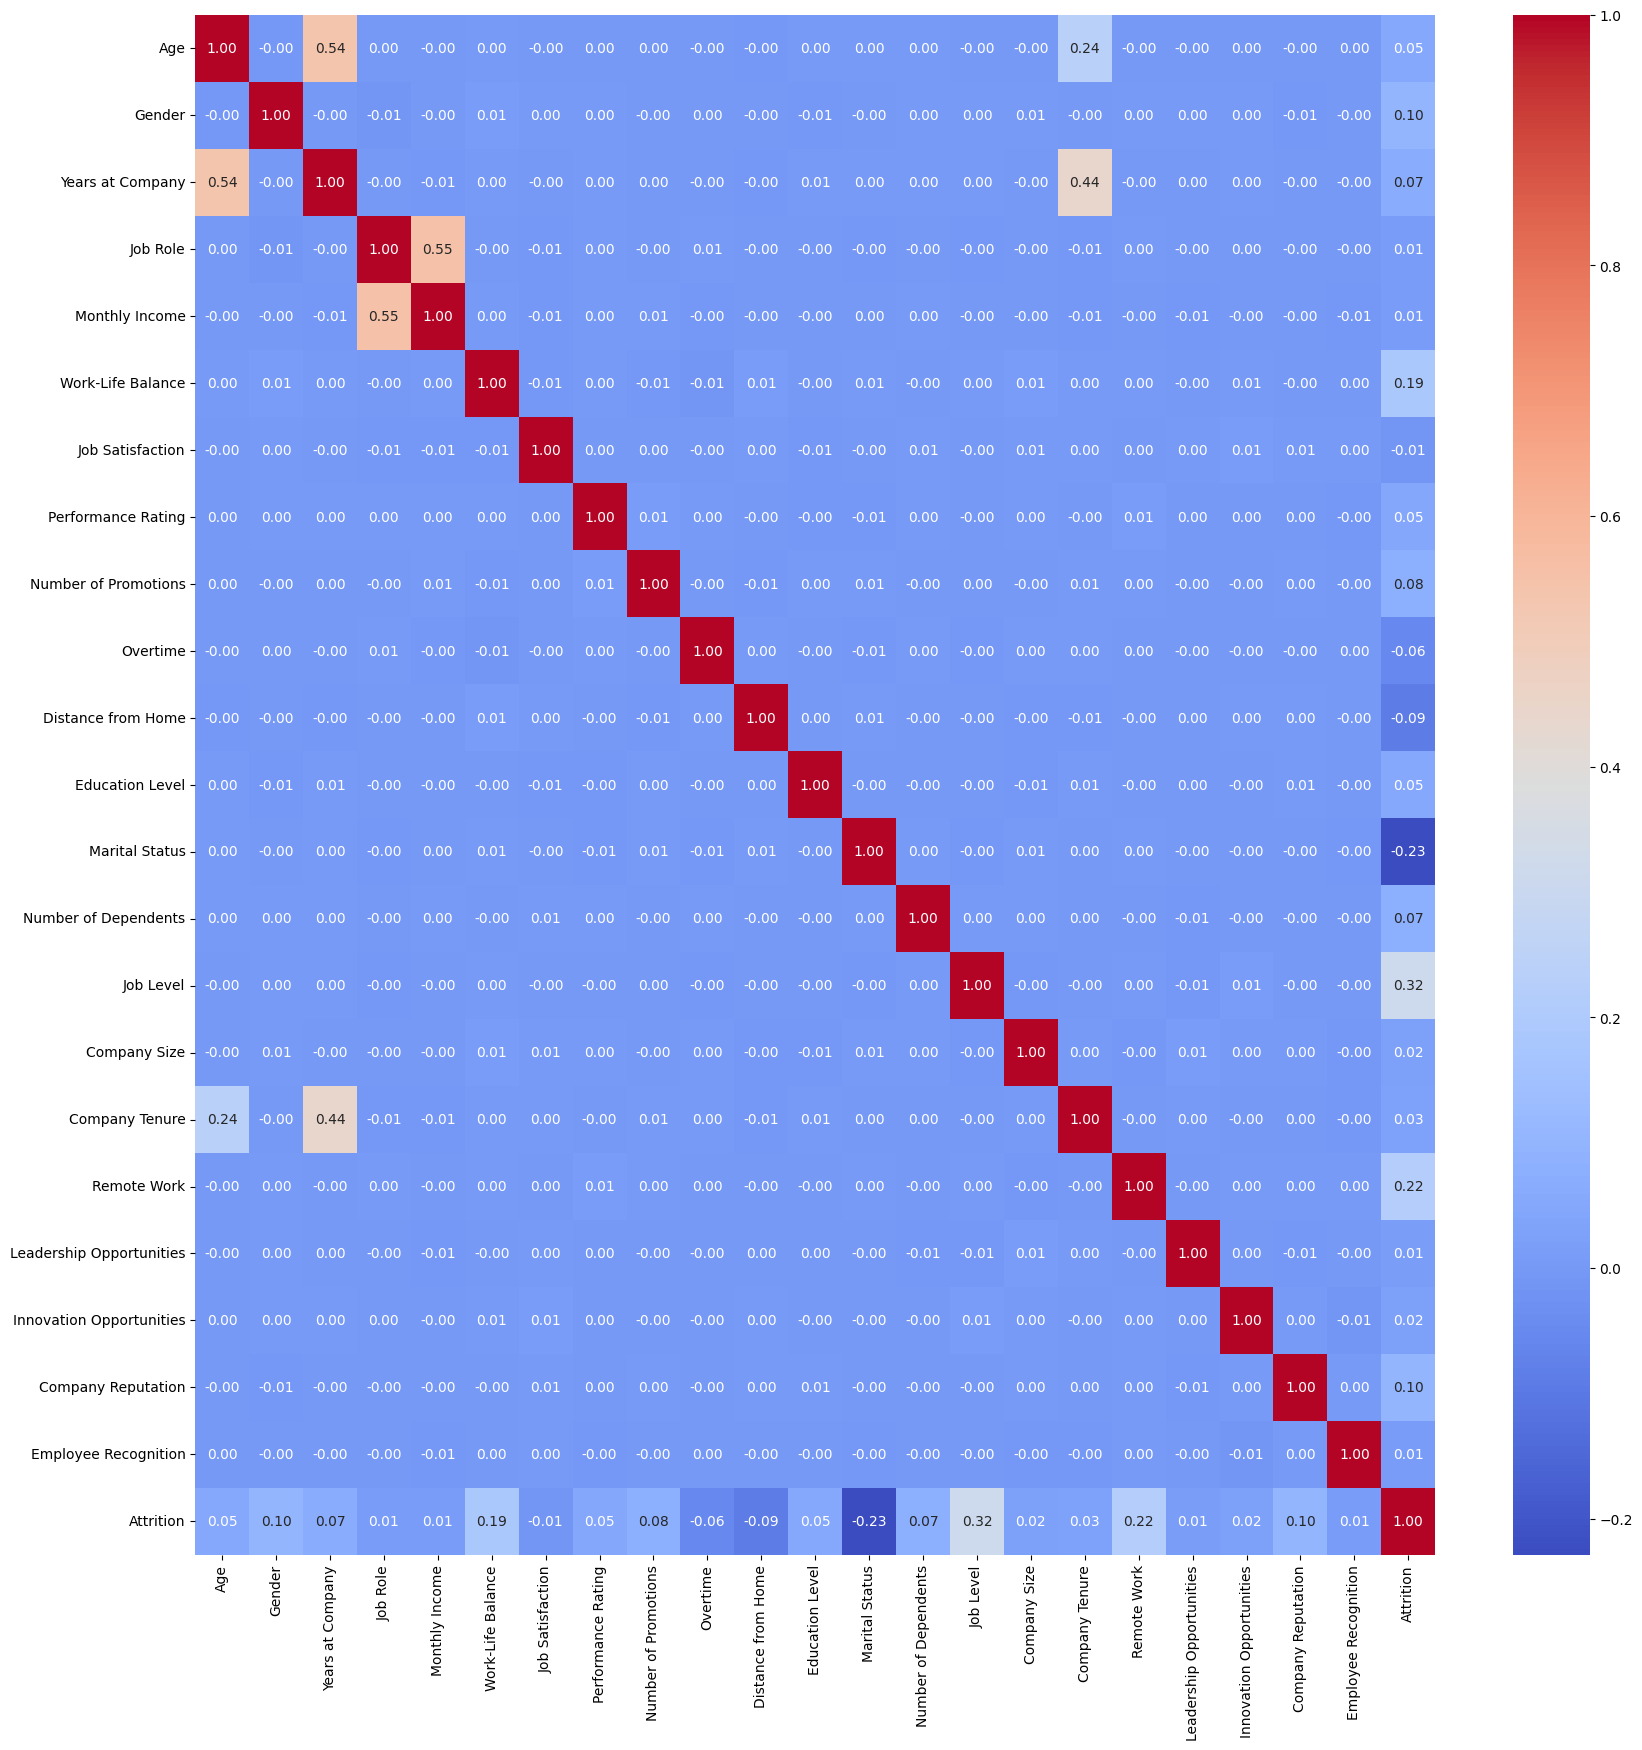

In [23]:
# Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [24]:
# Select columns with correlation > 0.1
corr = df.corr()
corr = corr[corr['Attrition'] > 0.1]
corr = corr['Attrition']
corr

Gender                0.100653
Work-Life Balance     0.186255
Job Level             0.315275
Remote Work           0.221144
Company Reputation    0.101053
Attrition             1.000000
Name: Attrition, dtype: float64

In [27]:
selected_df = corr

# Train Test Split

In [28]:
# train test split
X = selected_df.drop('Attrition', axis=1)
y = selected_df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

ValueError: No axis named 1 for object type Series